In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
import pandas as pd
import io
import os
import pyarrow.parquet as pq
import numpy as np

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Loading data

In [6]:
script_dir = os.path.dirname('__file__') #<-- absolute dir the script is in
rel_path = "s3_ROOM_CREATED_files/"
abs_file_path = os.path.join(script_dir, rel_path)
dataset = pq.ParquetDataset(abs_file_path)
table = dataset.read()

In [7]:
room_created = table.to_pandas()
room_created

,RoomNotifications
0,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
1,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
2,[{'NotificationMeta': {'X-Correlation-ID': '68...
3,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
4,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
5,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
6,[{'NotificationMeta': {'X-Correlation-ID': '25...
7,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
8,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
9,[{'NotificationMeta': {'X-Correlation-ID': 'OF...


In [8]:
room_created.iloc[0]

RoomNotifications    [{'NotificationMeta': {'X-Correlation-ID': 'OF...
Name: 0, dtype: object

# Splliting data

In [9]:
def explode_and_split(dataframe: pd.DataFrame, column: str):
    unnested = dataframe.explode(column)
    return pd.DataFrame(list(unnested[column]))

def split_and_merge(dataframe: pd.DataFrame, column: str):
    splited = pd.DataFrame(list(dataframe[column]))
    merged = dataframe.merge(splited, left_index=True, right_index=True)
    return merged.drop(columns=[column])

def explode_split_and_merge(dataframe: pd.DataFrame, column: str):
    unnested = dataframe.explode(column)
    splited = pd.DataFrame(list(unnested[column]))
    merged = splited.merge(unnested, left_index=True, right_index=True)
    return merged.drop(columns=[column])



In [10]:
room_created_splited = explode_and_split(room_created, "RoomNotifications")
room_created_splited

,NotificationMeta,CmmRoom
0,"{'X-Correlation-ID': 'OFF322384-6', 'Type': 'R...","{'CmHotelId': None, 'CmRoomId': 'TFTN', 'Origi..."
1,"{'X-Correlation-ID': 'OFF322384-6', 'Type': 'R...","{'CmHotelId': None, 'CmRoomId': 'XSTS', 'Origi..."
2,"{'X-Correlation-ID': 'OFF322386-1', 'Type': 'R...","{'CmHotelId': None, 'CmRoomId': 'KAKN', 'Origi..."
3,"{'X-Correlation-ID': 'OFF322386-2', 'Type': 'R...","{'CmHotelId': None, 'CmRoomId': 'CSTG', 'Origi..."
4,"{'X-Correlation-ID': 'OFF322386-2', 'Type': 'R...","{'CmHotelId': None, 'CmRoomId': 'XAIN', 'Origi..."
...,...,...
362,"{'X-Correlation-ID': 'OFF322310-1', 'Type': 'R...","{'CmHotelId': None, 'CmRoomId': 'TAAS', 'Origi..."
363,"{'X-Correlation-ID': 'OFF322321-12', 'Type': '...","{'CmHotelId': None, 'CmRoomId': 'KAQN', 'Origi..."
364,"{'X-Correlation-ID': 'OFF322359-2', 'Type': 'R...","{'CmHotelId': None, 'CmRoomId': 'XARS', 'Origi..."
365,"{'X-Correlation-ID': 'OFF322296-13', 'Type': '...","{'CmHotelId': None, 'CmRoomId': 'K1ON', 'Origi..."


In [23]:
room_created_notif = pd.DataFrame(list(room_created_splited["CmmRoom"]))

In [13]:
room_created_notif

,CmHotelId,CmRoomId,Origin,Name,Capacity,ApplicableRatePlans,Description,Facilities,Images,BedConfigurations,SmokingPermitted,Fees,OriginalData
0,None,TFTN,derbysoft,DELUXE TWIN ROOM NON SMOKING,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
1,None,XSTS,derbysoft,CROWNE DIPLOMATIC SUITE 1 KING SMOKING,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
2,None,KAKN,derbysoft,1 King Classic Accessible,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
3,None,CSTG,derbysoft,1 Bedroom Apartment,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
4,None,XAIN,derbysoft,2 King 2 Twin 3 Bedroom Apartment,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,None,TAAS,derbysoft,2 Single Beds Standard Smoking,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
363,None,KAQN,derbysoft,1 King Premium Non Smoking Lounge,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
364,None,XARS,derbysoft,1 King Bed Junior Suite Smoking,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,
365,None,K1ON,derbysoft,1KING BED STUDIO WITH SKYLINE VIEW,"{'MaxAdults': 2, 'MinAdults': None, 'ExtraChil...",None,None,[],[],None,None,None,


In [15]:
room_created_notif = split_and_merge(room_created_notif, "Capacity")

In [17]:
room_created_notif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CmHotelId            0 non-null      object 
 1   CmRoomId             367 non-null    object 
 2   Origin               367 non-null    object 
 3   Name                 367 non-null    object 
 4   ApplicableRatePlans  0 non-null      object 
 5   Description          25 non-null     object 
 6   Facilities           367 non-null    object 
 7   Images               367 non-null    object 
 8   BedConfigurations    0 non-null      object 
 9   SmokingPermitted     0 non-null      object 
 10  Fees                 0 non-null      object 
 11  OriginalData         367 non-null    object 
 12  MaxAdults            367 non-null    int64  
 13  MinAdults            0 non-null      object 
 14  ExtraChildren        3 non-null      float64
 15  MaxChildAge          3 non-null      flo

# Data Analysis

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [19]:
font = {'family' : 'sans serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

## Origin of room creation

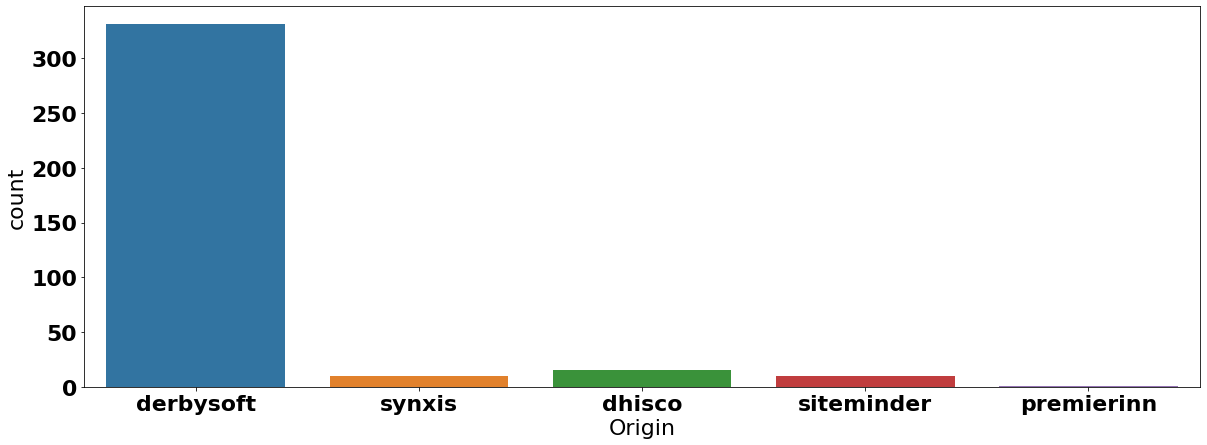

In [20]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="Origin", data=room_created_notif)

## Room capacity

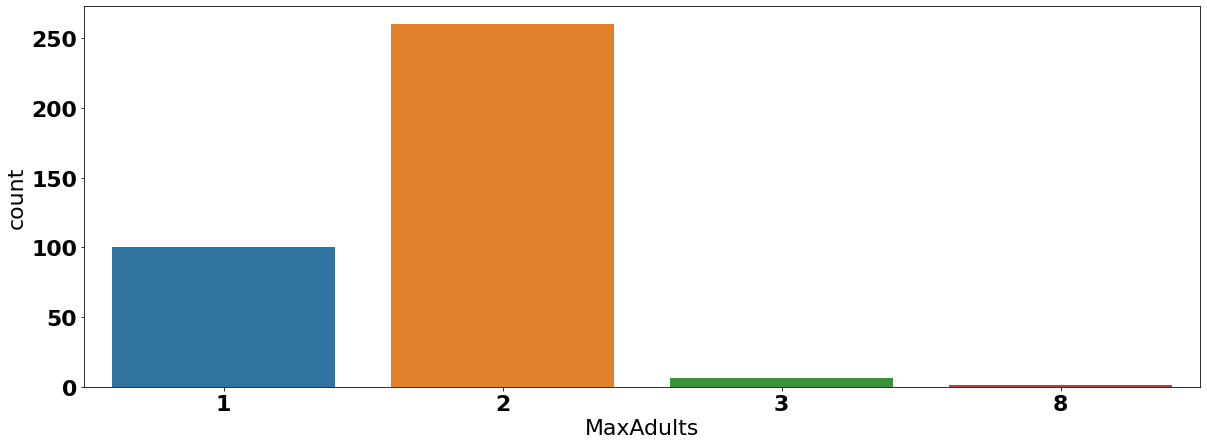

In [22]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(x="MaxAdults", data=room_created_notif)